# c)

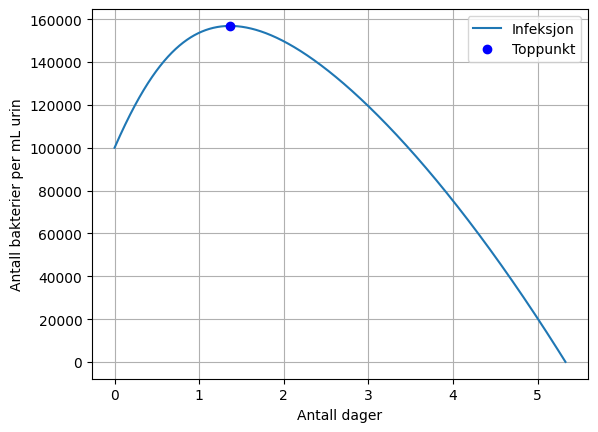

In [109]:
import matplotlib.pyplot as plt

bakterier = 100_000
t = 0
dt = 0.001

point = (0,0)
prev_bakterier = (t, bakterier)

data_x_list = []
data_y_list = []

while round(bakterier, 2) > 0:
    data_x_list.append(t)
    data_y_list.append(bakterier)

    bakterier += (bakterier * 0.25**t)*dt
    bakterier -= (10_000*(t + 1)*dt)

    if bakterier < prev_bakterier[1]:
        point = prev_bakterier
    else:
        prev_bakterier = (t, bakterier)

    t += dt

plt.plot(data_x_list, data_y_list, label="Infeksjon")
plt.plot(point[0], point[1], "bo", label="Toppunkt")
plt.xlabel("Antall dager")
plt.ylabel("Antall bakterier per mL urin")
plt.legend()
plt.grid()
plt.show()

# d)

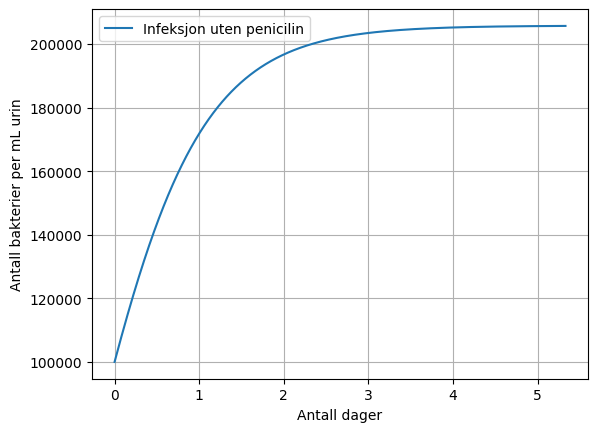

In [110]:
t_end = t
bakterier = 100_000
t = 0
dt = 0.001

x_list = []
y_list = []

while t < t_end:
    x_list.append(t)
    y_list.append(bakterier)
    bakterier += (bakterier * 0.25**t)*dt

    t += dt

plt.plot(x_list, y_list, label="Infeksjon uten penicilin")
plt.xlabel("Antall dager")
plt.ylabel("Antall bakterier per mL urin")
plt.legend()
plt.grid()
plt.show()


Etter hvert som t blir større blir antall formerte bakterier minske per døgn, dermed får vi en logistisk graf som vi ser ovenfor.

# e)

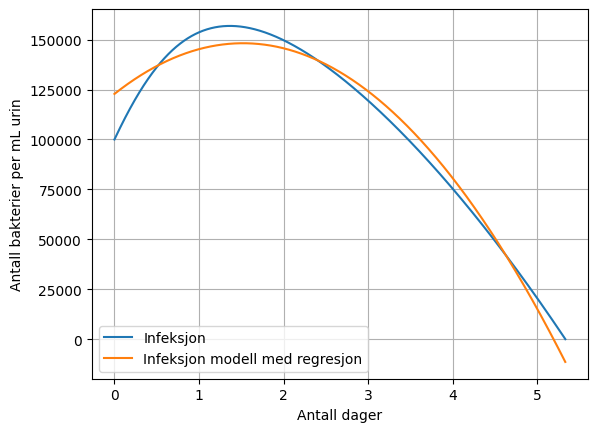

In [111]:
import scipy.optimize as so
import numpy as np

def mal_N(x, a, b, c):
    return a*x**2 + b*x + c

constants = so.curve_fit(mal_N, data_x_list, data_y_list, [160000, 0.1, 1])[0]
a = constants[0]
b = constants[1]
c = constants[2]

def N(x):
    return a*x**2 + b*x + c

x = 0
x_maks = max(data_x_list)
dx = 0.001

x_list = []
y_list = []

while x < x_maks:
    x_list.append(x)
    y_list.append(N(x))

    x += dx

plt.plot(data_x_list, data_y_list, label="Infeksjon")
plt.plot(x_list, y_list, label="Infeksjon modell med regresjon")
plt.xlabel("Antall dager")
plt.ylabel("Antall bakterier per mL urin")
plt.grid()
plt.legend()
plt.show()

# f)

In [112]:
x = 0
prev_y = (0, 0)

while round(N(x), 3) > 0:
    if N(x) > prev_y[1]:
        prev_y = (x, N(x))
    
    x += dx

print(f"Det tar {round(x, 3)} dager før infeksjonen er over, og {round(prev_y[0], 3)} dager før infeksjonen har nådd toppen.")

Det tar 5.192 dager før infeksjonen er over, og 1.519 dager før infeksjonen har nådd toppen.


Vi ser at grafen er litt forskjøvet sammenlignet med grafen fra oppgave c. Grafen her når toppen litt senere enn i c, men infeksjonen er over litt før. Jeg mener modellen er ganske bra. I modellen så stopper infeksjonen litt etter 5 dager, og vi ser dette stemmer med grafen i d, med tank på at den er nokså flat etter 5 dager. Svarene i 1) og 2) er nokså like. Med tanke på at dette er egentlig en sammensatt funksjon, vurderer jeg modellen bra.
# g)
Jeg tror funksjonen er satt sammen av en logstisk, lineær og andregrads funksjoner. Dette er basert på observasjonene over.